### [Q1.] How can you create a Bokeh plot using Python code?
##### [Ans]

In [1]:
import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
from bokeh.plotting import figure ,output_file , show
from bokeh.sampledata.iris import flowers

In [3]:
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
p = figure(title="TEST FLOWER")
p.xaxis.axis_label="PETAL LENGTH"
p.yaxis.axis_label="PETAL WIDTH"
p.circle(flowers['petal_length'] , flowers['petal_width'])
show(p)

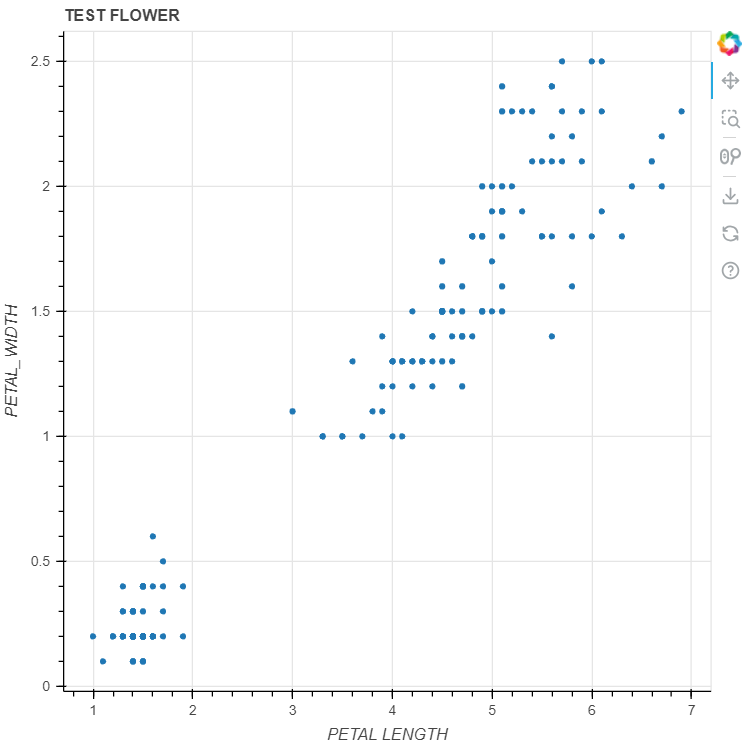

### [Q2.] What are glyphs in Bokeh, and how can you add them to a Bokeh plot? Explain with an example.
##### [Ans]

In Bokeh, glyphs are the visual elements used to represent data in a plot. They can be simple shapes like circles, squares, or lines, or more complex ones like wedges, patches, and bars. Bokeh provides a variety of glyphs that allow you to create visually appealing and informative visualizations.

In [ ]:
# EXAMPLE :
x = [1,2,3,4,5]
y = [6,7,2,4,5]

p = figure(title='LINE PLOT')
p.xaxis.axis_label='X-AXIS'
p.yaxis.axis_label='Y-AXIS'
p.line(x=x , y=y)
show(p)

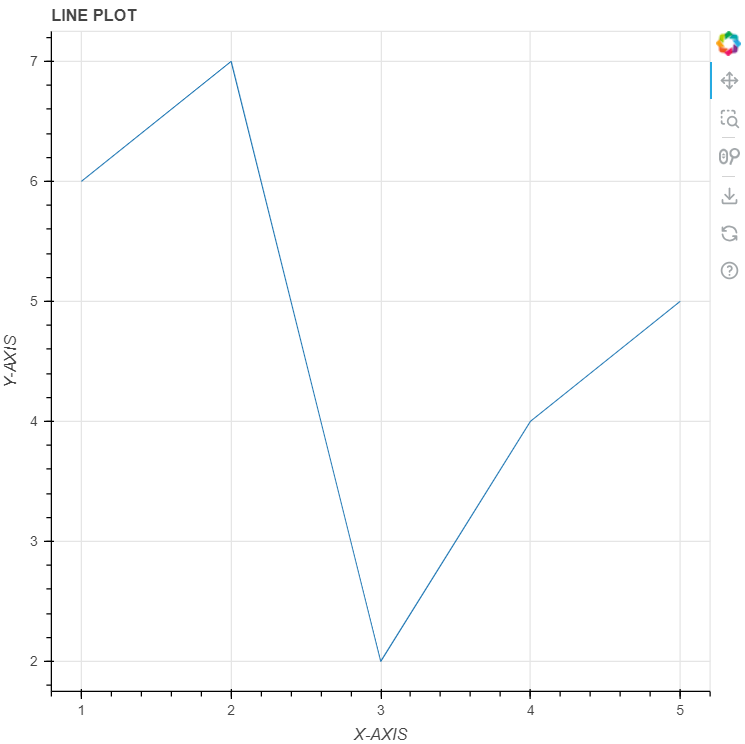

### [Q3.] How can you customize the appearance of a Bokeh plot, including the axes, title, and legend?
##### [Ans]

In [ ]:
import numpy as np
x = np.linspace(0,10,100)
y = np.sin(x)

p = figure(title='SINE WAVE GRAPH')
p.xaxis.axis_label = 'X-AXIS'
p.yaxis.axis_label = 'Y-AXIS'

p.line(x=x , y=y,line_width=2 , line_color='yellow' , legend_label='DATA POINTS')
p.circle(x=x ,y=y , size=6 ,  fill_color='red' , legend_label='SIN(X)')

show(p)

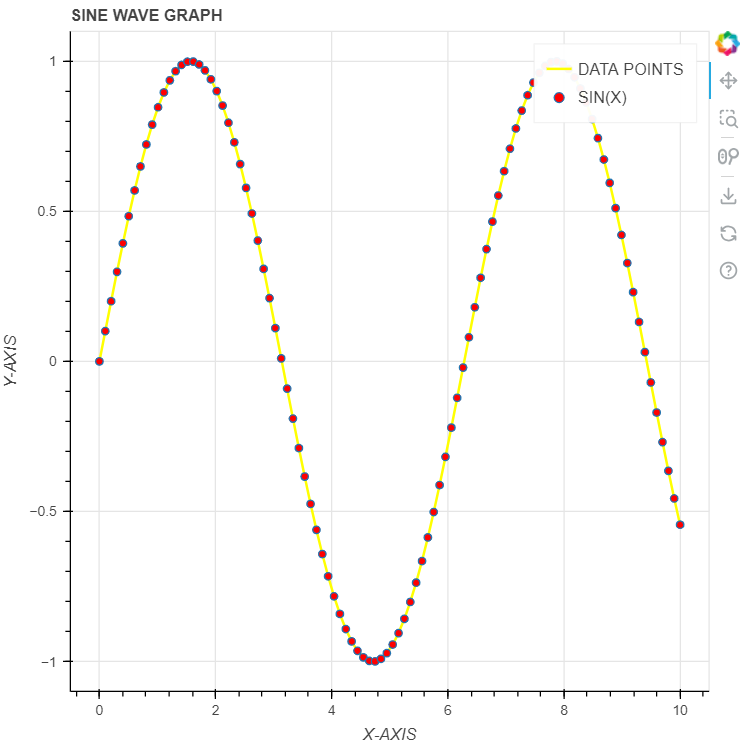

### [Q4.] What is a Bokeh server, and how can you use it to create interactive plots that can be updated in real time?
##### [Ans]

A Bokeh server is a way to deploy Bokeh applications or dashboards on a web server, and access them through a web browser.

With a Bokeh server, you can create interactive plots, widgets and applications that can be updated in real time, respond to user input and events, and easily access data from various sources.

By using the Bokeh server, you can create powerful data visualization applications that can help you analyze, explore, and communicate your data more effectively.

### [Q5.] How can you embed a Bokeh plot into a web page or dashboard using Flask or Django?
##### [Ans]

To embed a Bokeh plot into a web page or dashboard using Flask or Django, you can use the Bokeh server together with either of these web frameworks. Here are the basic steps:

- Define a Bokeh application that creates the desired plot and any other interactive elements you want to include.
- Start the Bokeh server from your Flask or Django application, using the bokeh.server.server.Server class.
- Create a URL route in your Flask or Django application that serves as the entry point for the Bokeh app.
- In the Bokeh app, use the bokeh.embed.server_document function to generate an HTML script tag that loads the Bokeh app into the web page.

In [ ]:
from flask import Flask, render_template
from bokeh.embed import server_document
from bokeh.server.server import Server

# Define the Bokeh app
def bokeh_app(doc):
    p = figure(x_range=(0, 10),
           y_range=(0, 20),
           x_axis_label='X-axis',
           y_axis_label='Y-axis',
           title='Scatter Plot',
           )
    p.circle([1, 2, 3, 4, 5],
            [6, 7, 2, 4, 5],
            size=10,
            color='navy',
            legend_label='Data Points')
    p.legend.location = 'top_left'

# Initialize the Flask app
app = Flask(__name__)

# Register a route that serves the Bokeh app
@app.route('/bokeh')
def bokeh_route():
    script = server_document('http://localhost:5006/myapp')
    return render_template('bokeh.html', script=script)

# Define the Bokeh server and start it
bokeh_server = Server({'/myapp': bokeh_app})
bokeh_server.start()

# Start the Flask app
if __name__ == '__main__':
    app.run(debug=True)